In [1]:
%%HTML
<!-- execute this cell before continue -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Lato">
<style>.reveal * { font-family: "Lato" !important; } .reveal .code_cell * { font-family: monospace !important; }</style>

<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h1 style="color: white; position: absolute; top:30%; left:10%;">
    Web Scraping in Python
</h1>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:43%; left:10%;">
    David Mertz, Ph.D.
</h3>
</div>

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img>

<img src="https://user-images.githubusercontent.com/7065401/98864025-08deda80-2448-11eb-9600-22aa17884cdf.png" style="height: 100%; max-height: inherit; position: absolute; top: 20%; left: 0px;"></img>
<br>

<h2 style="font-weight: bold;">
    David Mertz
</h2>

<h3 style="color: #ef7d22; margin-top: 0.8em">
    Data Scientist
</h3>
<hr>
<br><br>

<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    mertz@kdm.training
</p>
<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    @mertz_david
</p>
<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    linkedin.com/in/dmertz
</p>

</div>

<br><br><br>

<h2 style="font-weight: bold;">
    Selenium
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

Selenium is not exactly a web scraping library, although it can absolutely be useful for that purpose. Its documentation describes it as:

> Selenium is many things but at its core, it is a toolset for web browser automation that uses the best techniques available to remotely control browser instances and emulate a user’s interaction with the browser.

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

Continuing the project blurb:

> It allows users to simulate common activities performed by end-users; entering text into fields, selecting drop-down values and checking boxes, and clicking links in documents. It also provides many other controls such as mouse movement, arbitrary JavaScript execution, and much more.<br/><br/>
> Although used primarily for front-end testing of websites, Selenium is at its core a browser user agent library. The interfaces are ubiquitous to their application, which encourages composition with other libraries to suit your purpose.

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

<div style="text-align: left;">
    
There are a few steps involved in installing Selenium.  
    
* As a first step, you will need to install one or more browsers on your system.
* The Python language binding itself can be installed with `pip install selenium` or `conda install selenium`.  For other programming languages, binding installation is similar, using the native installers.
* You need webdrivers corresponding with the browsers you have installed.  Links to those various drivers can be found at: https://www.selenium.dev/documentation/en/webdriver/driver_requirements/.
* Assure that the webdrivers live on your executable path (the path may also be passed as a driver option).

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

Supported drivers:

|  Browser          | Platforms
|:------------------|--------------------------
| Chromium/Chrome   | Windows, OSX, Linux
| Firefox           | Windows, OSX, Linux
| Edge              | Windows 10
| Internet Explorer | Windows
| Safari            | macOS El Capitan and newer
| Opera             | Windows, OSX, Linux

Note that you need the version for the specific *version* of a browser you are running.



<h2 style="font-weight: bold;">
    Emulating browsers
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

Many websites check for what browser is accessing them.  Moreover, in edge cases or with buggy HTML/JavaScript/CSS, the behavior of different browsers can vary.

Although Scrapy, or even just `requests`, can declare a user agent that a server may be checking for, Selenium drives the browser itself, hence capturing every quirk it may have in its behavior.  Hence the main use of Selenium is in testing server behavior against various browsers that might access them.

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

Let us access a site that specific echoes the reported browser from the HTTP header.

In [2]:
from pathlib import Path  # Use later
from time import sleep
from bs4 import BeautifulSoup
import requests

url = "https://www.whatismybrowser.com/detect/what-is-my-user-agent"
agent = requests.get(url)
soup = BeautifulSoup(agent.text)
soup.find(id="detected_value").text

'python-requests/2.23.0'

Reported agents are Chromium on Linux, Firefox on Linux, and TorBrowser on Android.

In [3]:
agents = {
    "Firefox on Linux":
          "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:79.0) Gecko/20100101 Firefox/79.0",
    "Chromium on Linux": 
        "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko)"
        " Chrome/83.0.4103.116 Safari/537.36",
    "Tor on Android": "Mozilla/5.0 (Android 9; Mobile; rv:78.0) Gecko/20100101 Firefox/78.0"
}
for description, agent in agents.items():
    resp = requests.get(url, headers={'User-agent': agent})
    soup = BeautifulSoup(resp.text)
    print(description)
    print(soup.find(id="detected_value").text, end='\n\n')

Firefox on Linux
Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:79.0) Gecko/20100101 Firefox/79.0

Chromium on Linux
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36

Tor on Android
Mozilla/5.0 (Android 9; Mobile; rv:78.0) Gecko/20100101 Firefox/78.0



<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

The limitation of the technique above is that while the server will adapt its behavior based on what `requests` sends, that does not really tell you anything about what that browser will render.  For web scraping purposes you may simply not care about that.  After all, what you want is content within the page, not the specific appearance that content is given by a given browser.

<h2 style="font-weight: bold;">
    Driving a browser
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

One notable, and common, exception to browser indifference is when some important content is dynamically rendered by JavaScript within the page.  We saw a simple example of that at the end of the last lesson.  Scraping my KDM Training homepage had the contact email obscured by the CloudFlare proxy, so that what was actually delivered was not the email itself, but a transformed version of it.

As rendered by a browser, that obscuring would be undone by embedded JavaScript, but in the Scrapy shell we had to use a Python function to perform the unobscuring (we could also have installed the `scrapy-splash` middleware component within Scrapy.  Selenium simply sees what the browser user sees.

Let us retrieve one quote from the quote server at `toscrape.com` using Selenium and Firefox.

In [4]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.expected_conditions import presence_of_element_located
from selenium.webdriver.chrome.options import Options

with webdriver.Firefox() as driver:
    wait = WebDriverWait(driver, 10)
    driver.get("https://quotes.toscrape.com/random")
    sleep(7)  # artificial wait to see browser longer
    quote_text = wait.until(presence_of_element_located(
                                (By.CSS_SELECTOR, "div.quote>span")))
    print(quote_text.get_attribute("textContent"))

“To love at all is to be vulnerable. Love anything and your heart will be wrung and possibly broken. If you want to make sure of keeping it intact you must give it to no one, not even an animal. Wrap it carefully round with hobbies and little luxuries; avoid all entanglements. Lock it up safe in the casket or coffin of your selfishness. But in that casket, safe, dark, motionless, airless, it will change. It will not be broken; it will become unbreakable, impenetrable, irredeemable. To love is to be vulnerable.”


<h2 style="font-weight: bold;">
    Going headless
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

In the last slide we saw the automation via launching a browser then intering with it.  In a scraping context we usually want to run the browser in "headless mode."  The full browser is running, but some, such as Firefox and Chrome, can be instructed not to display their windows.

In [5]:
options = Options()
options.headless = True
driver_path = Path.home() / 'bin' / 'chromedriver'

with webdriver.Chrome(options=options, 
                      executable_path=driver_path) as driver:
    wait = WebDriverWait(driver, 10)
    driver.get("https://quotes.toscrape.com/random")
    quote_text = wait.until(presence_of_element_located(
                                (By.XPATH, '//*[@class="quote"]/span')))
    print(quote_text.get_attribute("textContent"))

“But better to get hurt by the truth than comforted with a lie.”


<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

Let's try retrieving my obscured email shown in the last lesson.

In [6]:
with webdriver.Chrome(options=options) as driver:
    wait = WebDriverWait(driver, 10)
    driver.get("https://kdm.training")
    contact = wait.until(presence_of_element_located(
                            (By.XPATH, '//*[@id="Contact"]//a')))
    print(contact.get_attribute("href"))

mailto:info@kdm.training


Perhaps we would even like to see what a rendered portion of the page looks like.

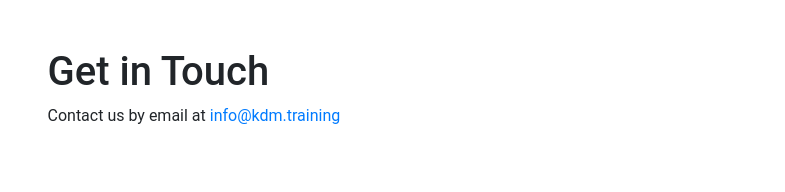

In [7]:
from IPython.display import display, Image
with webdriver.Chrome(options=options) as driver:
    wait = WebDriverWait(driver, 10)
    driver.get("https://kdm.training")
    contact = wait.until(presence_of_element_located(
                            (By.XPATH, '//*[@id="Contact"]')))
    contact.screenshot('href.png')
    display(Image('href.png'))

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

Without using the browser to run the embedded Javascript:

In [8]:
kdm = requests.get('https://kdm.training')
soup = BeautifulSoup(kdm.text)
print(soup.find(id="Contact").find('a').prettify())

<a href="/cdn-cgi/l/email-protection#6b02050d042b000f06451f190a020502050c">
 <span class="__cf_email__" data-cfemail="563f383039163d323b782224373f383f3831">
  [email protected]
 </span>
</a>


<h2 style="font-weight: bold;">
    Scripting behavior
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

Usually we wish to use Selenium to script behaviors of the web browser.  We can simulate mouse actions, drag-and-drop, interacting with alerts, completing forms, clicking on regions, and basically anything else a user might do.  Most of that is not necessarily relevant to web scraping *per se*, but completing forms absolutely is.

For the next few slides we will "manually" drive the web browser. 

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

In [9]:
driver = webdriver.Chrome()
wait = WebDriverWait(driver, 10)
driver.get('https://quotes.toscrape.com')

In [10]:
find = presence_of_element_located
login_link = wait.until(find((By.XPATH, '//*[@href="/login"]')))
login_link

<selenium.webdriver.remote.webelement.WebElement (session="4fd4ade64cbcaddea0910d19c323ace1", element="a04adb01-f113-4e91-9ebd-7a594790f711")>

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

We can follow that link identified.

In [11]:
login_link.click()

In [12]:
username = driver.find_element(By.ID,'username')
username.send_keys("test_user")

In [13]:
password = driver.find_element(By.ID,'password')
password.send_keys("test_password")

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

Now we can find and click on the button for logging in.

In [14]:
button = wait.until(find((By.XPATH, '//*[@type="submit"]')))
button.click()

<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

We might, for example, extract all the authors in a similar manner as we have done with Scrapy and Beautiful Soup.

In [15]:
for quote in driver.find_elements(By.CSS_SELECTOR, 'div.quote'):
    author = quote.find_element(By.XPATH, 'span/small')
    print(author.get_attribute("textContent"))

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img></div>

When done, we can close the browser.

In [16]:
driver.close()

All of this, of course, be done in headless mode, and in a reusable function, once we have figured out the particular navigation steps necessary to find the content of interest.

<h2 style="font-weight: bold;">
    Summary
</h2>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

For acquiring large amounts of scraped content, Scrapy is certainly a more appropriate library than Selenium.  The primary focus of Selenium is on validating websites against multiple browser, operating systems, versions, etc.  However, in cases where the content you wish to scrape really does depend on the browser's rendering techniques, Selenium is a very handy tool to have available.